In [324]:
import pandas as pd
import numpy as np
import matplotlib as plt
import sklearn
from scipy.stats import describe


In [216]:
df = pd.read_excel(r'C:\Users\sagar\Desktop\AIMS+CMED\test-dataset.xlsx')


In [217]:
print(describe(df['age']))

DescribeResult(nobs=29999, minmax=(0, 120), mean=38.637621254041804, variance=306.0495226566, skewness=0.6196112060813217, kurtosis=1.3970305459554186)


In [218]:
df.describe()

,household_id,user_id,age,is_poor,is_freedom_fighter,had_stroke,has_cardiovascular_disease,SYSTOLIC,DIASTOLIC,HEIGHT,WEIGHT,BMI,SUGAR,PULSE_RATE,SPO2,MUAC
count,29999.000000,2.999900e+04,29999.000000,29999.0,29999.000000,29999.000000,29999.000000,27600.000000,27600.000000,1128.000000,1128.000000,1128.000000,1583.000000,27455.000000,4345.000000,74.000000
mean,220657.302510,9.784833e+05,38.637621,0.0,0.000200,0.000767,0.001133,122.163623,76.133949,147.798502,50.027589,22.736490,9.990543,83.635913,97.627657,13.585946
std,158927.210137,8.081330e+05,17.494271,0.0,0.014141,0.027679,0.033647,20.863131,12.277434,22.769384,15.096071,6.036540,5.242119,12.678662,4.026527,1.266408
min,12300.000000,9.680400e+04,0.000000,0.0,0.000000,0.000000,0.000000,52.000000,30.000000,35.560000,5.000000,1.581636,0.110000,1.000000,5.000000,11.000000
25%,81244.500000,3.516110e+05,26.000000,0.0,0.000000,0.000000,0.000000,107.000000,68.000000,137.160000,44.000000,18.920936,6.410000,75.000000,98.000000,13.000000
50%,219654.000000,9.050990e+05,37.000000,0.0,0.000000,0.000000,0.000000,120.000000,75.000000,152.400000,50.000000,21.958377,8.120000,83.000000,99.000000,13.500000
75%,279809.500000,1.122635e+06,50.000000,0.0,0.000000,0.000000,0.000000,132.000000,83.000000,162.560000,59.000000,25.795170,11.960000,92.000000,99.000000,14.500000
max,786118.000000,4.040559e+06,120.000000,0.0,1.000000,1.000000,1.000000,227.000000,144.000000,243.840000,97.000000,67.932934,35.000000,206.000000,100.000000,17.600000


In [225]:
df.fillna(0,inplace=True)

In [334]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
#here the contingency table is made and kept in a data frame data_crosstab
data_crosstab = pd.crosstab(df['had_stroke'],
                            df['has_cardiovascular_disease'],
                               margins = False)
table = data_crosstab.values.tolist()
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)

prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

[[29948, 28], [17, 6]]
dof=1
[[2.99420261e+04 3.39739325e+01]
 [2.29739325e+01 2.60675356e-02]]
probability=0.950, critical=3.841, stat=1151.661
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


In [335]:
print(data_crosstab)

has_cardiovascular_disease      0   1
had_stroke                           
0                           29948  28
1                              17   6


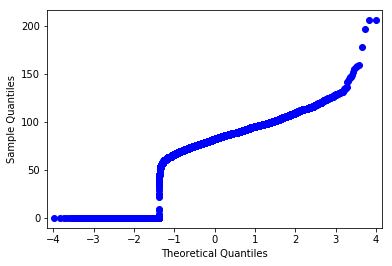

In [259]:
import statsmodels.api as sm
import pylab
data = df['PULSE_RATE']
sm.qqplot(data)
pylab.show()

In [260]:
from scipy.stats import kstest, norm
my_data = df['PULSE_RATE'].values.tolist()
ks_statistic, p_value = kstest(my_data, 'norm')
print(ks_statistic, p_value)

0.9151321675527934 0.0


In [261]:
print(my_data)

[96.0, 89.0, 69.0, 85.0, 101.0, 87.0, 90.0, 70.0, 61.0, 61.0, 66.0, 69.0, 72.0, 92.0, 59.0, 87.0, 109.0, 96.0, 80.0, 78.0, 79.0, 74.0, 79.0, 78.0, 82.0, 72.0, 80.0, 89.0, 77.0, 79.0, 92.0, 73.0, 79.0, 71.0, 76.0, 75.0, 103.0, 97.0, 81.0, 63.0, 76.0, 86.0, 66.0, 89.0, 76.0, 90.0, 65.0, 75.0, 78.0, 81.0, 78.0, 101.0, 60.0, 77.0, 81.0, 74.0, 89.0, 95.0, 100.0, 73.0, 61.0, 77.0, 84.0, 91.0, 84.0, 93.0, 108.0, 102.0, 83.0, 76.0, 95.0, 70.0, 89.0, 80.0, 76.0, 80.0, 65.0, 68.0, 88.0, 73.0, 62.0, 88.0, 91.0, 87.0, 120.0, 67.0, 94.0, 71.0, 107.0, 84.0, 71.0, 79.0, 77.0, 107.0, 88.0, 81.0, 72.0, 87.0, 95.0, 95.0, 95.0, 67.0, 89.0, 72.0, 73.0, 79.0, 73.0, 101.0, 79.0, 82.0, 74.0, 83.0, 70.0, 76.0, 82.0, 66.0, 89.0, 103.0, 81.0, 71.0, 80.0, 104.0, 81.0, 87.0, 80.0, 80.0, 82.0, 77.0, 67.0, 86.0, 81.0, 60.0, 118.0, 57.0, 94.0, 58.0, 100.0, 94.0, 87.0, 89.0, 84.0, 83.0, 63.0, 74.0, 86.0, 83.0, 75.0, 62.0, 71.0, 67.0, 105.0, 83.0, 63.0, 93.0, 80.0, 71.0, 76.0, 86.0, 86.0, 82.0, 77.0, 62.0, 91.0, 103.0

In [285]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(df['WEIGHT'], df['HEIGHT'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=449336581.500, p=0.182
Same distribution (fail to reject H0)


In [317]:
from scipy.stats import spearmanr
corr, _ = spearmanr(df['SUGAR'], df['PULSE_RATE'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: -0.093


In [327]:
x = df.iloc[:, [8, 12, 15]].values
y = df.iloc[:, 13].values

In [328]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
        x, y, test_size = 0.25, random_state = 0)

In [329]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)
  
print (xtrain[0:10, :])

[[-0.49685906 -0.02211673 -0.14447176]
 [ 1.7833486  -0.02211673 -0.14447176]
 [-0.21183311 -0.02211673 -0.14447176]
 [ 0.30121362 -0.02211673 -0.14447176]
 [-1.12391617 -0.02211673 -0.14447176]
 [ 0.415224   -0.02211673 -0.14447176]
 [ 0.64324477 -0.02211673 -0.14447176]
 [-0.49685906 -0.02211673 -0.14447176]
 [ 0.07319285 -0.02211673 -0.14447176]
 [-0.09782272 -0.02211673 -0.14447176]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [330]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [331]:
y_pred = classifier.predict(xtest)

In [332]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[7489    2]
 [   7    2]]


In [333]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.9988
